<h1><center> Figure 2: boxplots of betas and intercepts (rows) by models (columns) </center></h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import os
import subprocess
import seaborn as sns
import IPython.display as display
%matplotlib inline

In [2]:
#import data and create dictionary
# create a dictionary with the datasets
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume.nc')
file_list_biovol_hist = [x for x in file_list_biovol if 'hist' in x]
file_list_biovol_ssp5 = [x for x in file_list_biovol if 'ssp5' in x]

file_list_climatology = glob('/work/m1c/CMIP6_biome_PSS_data/*climatology_all*')

file_list_gCarbon = list(set(file_list).difference(file_list_biovol+file_list_climatology))
file_list_gCarbon_hist = [x for x in file_list_gCarbon if 'hist' in x]
file_list_gCarbon_ssp5 = [x for x in file_list_gCarbon if 'ssp5' in x]


In [3]:
model_list = ['CESM', 'CMCC','CNRM','GFDL','GISS','IPSL','UKESM']

In [4]:

model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist']={}
ds_dict['ssp5']={}

for e in ['hist', 'ssp5']:
    for m in model_list:
        model_path = [x for x in file_list_gCarbon if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path)

ValueError: Every dimension needs a coordinate for inferring concatenation order

In [ ]:
ds_dict['hist']['GFDL']

In [ ]:
df_NBSS = pd.DataFrame()
for e in ['hist', 'ssp5']:
    for m in model_list:
        for b in [1, 2, 3]:
            df= pd.DataFrame()
            df['betas'] = pd.Series(ds_dict[e][m]['betas_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['betas_'+e] != float('-inf')).values.ravel())
            df['intercept'] = pd.Series(ds_dict[e][m]['intercept_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['intercept_'+e] != float('-inf')).values.ravel())
            df['R2'] = pd.Series(ds_dict[e][m]['R2_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['R2_'+e] != float('-inf')).values.ravel())
            df= df[~df['betas'].isna()].reset_index(drop=True)
            df= df[~df['intercept'].isna()].reset_index(drop=True)
            df= df[~df['R2'].isna()].reset_index(drop=True)
            df['experiment'] = e
            if b ==1:
                df['biome'] = 'LC'
            elif b ==2:
                df['biome'] = 'HCSS'
            elif b ==3:
                df['biome'] = 'HCPS'
            df['model'] = m
            df_NBSS= pd.concat([df_NBSS, df])

In [ ]:
df_NBSS

In [ ]:
df_NBSS=.pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs.csv', sep=',')
df_NBSS.drop(columns=['month', 'season', 'selec'])

df_NBSS.head()

In [ ]:
df_NBSS_NO_GISS  = df_NBSS[df_NBSS['model']!= 'GISS'].reset_index()
df_NBSS_GISS  = df_NBSS[df_NBSS['model']== 'GISS'].reset_index()

In [ ]:
model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM', 'PSSdb']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
variables = ['betas', 'intercept', 'R2']
for r, var in enumerate(variables):
    plot = sns.violinplot(ax = axs[r], x="model", y=var, hue="experiment", showfliers = True, data=df_NBSS_NO_GISS) #, flierprops=dict(marker='o', markersize=0.5)
    plot.tick_params(axis='both', which='major', labelsize=15)
    sns.despine(top = True, right = True)
    if var == 'betas':
        axs[r].set_ylim([-2, -0.9])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ g C$^{-1}$)', fontsize = 17)
    elif var == 'intercept':
        axs[r].set_ylim([-10, 5])
        axs[r].set_ylabel(r'Intercept ( g C m$^{-2}$ g C$^{-1}$)', fontsize = 17)
        axs[r].get_legend().remove()
    elif var == 'R2':
        axs[r].set_ylim([0.2, 0.9])
        axs[r].set_ylabel(r'Determination coefficient R$^{2}$', fontsize = 17)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('fig_model_avg_NO_GISS.pdf', dpi=300)

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(2.9,10))

variables = ['betas', 'intercept', 'R2']
for r, var in enumerate(variables):
    plot = sns.violinplot(ax = axs[r], x="model", y=var, hue="experiment", showfliers = True, data=df_NBSS_GISS) #, flierprops=dict(marker='o', markersize=0.5)
    plot.tick_params(axis='both', which='major', labelsize=15)
    sns.despine(top = True, right = True)
    if var == 'betas':
        axs[r].set_ylabel(r' Slope ( dm$^{-3}$ $\mu$m$^{-3}$)', fontsize = 17)
    elif var == 'intercept':
        axs[r].set_ylabel(r'Intercept ( g C m$^{-2}$ g C$^{-1}$)', fontsize = 17)
        axs[r].get_legend().remove()
    elif var == 'R2':
        axs[r].set_ylabel(r'Determination coefficient R$^{2}$', fontsize = 17)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('fig_model_avg_GISS.pdf', dpi=300)

In [ ]:
experiments = list(ds_dict.keys())

In [ ]:
experiments

In [ ]:
model_list

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(30,10))
variables = ['betas', 'intercept']
for c, m in enumerate(model_list):
    #print(r)
    for r, var in enumerate(variables):
        #print(c)
        ax_n = axs[r,c]
        if var == 'betas':
            name = 'slope'
        else:
            name = var
        sns.boxplot(ax = ax_n, x="biome", y=var, hue="experiment", showfliers = False, data=df_NBSS[df_NBSS['model']== m]).set(title= (name + ' for model ' + m + ' by biome'))
        ax_n.tick_params(axis='both', which='major', labelsize=15)
        if r == 0:
            ax_n.set_title(m, fontsize=20)
        else:
            ax_n.set_title('')
        if var == 'betas':
            if m =='CESM':
                ax_n.set_ylim([-1.4, -0.9])
            if m =='CMCC':
                ax_n.set_ylim([-1.575, -1.35])
            if m =='CNRM':
                ax_n.set_ylim([-1.5, -1.1])
            if m =='GFDL':
                ax_n.set_ylim([-1.8, -1.1])
            if m =='GISS':
                ax_n.set_ylim([-3.6, -0.3])
            if m =='IPSL':
                ax_n.set_ylim([-1.5, -1.2])
            if m =='UKESM':
                ax_n.set_ylim([-2, -1.4])
        elif var == 'intercept':
            if m =='CESM':
                ax_n.set_ylim([-1.8, 1])
            if m =='CMCC':
                ax_n.set_ylim([-4, -0.9])
            if m =='CNRM':
                ax_n.set_ylim([-3.7, 0.5])
            if m =='GFDL':
                ax_n.set_ylim([-3.2, 0.5])
            if m =='GISS':
                ax_n.set_ylim([-18, 3.5])
            if m =='IPSL':
                ax_n.set_ylim([-3.7, -0.2])
            if m =='UKESM':
                ax_n.set_ylim([-7, 0.5])
        if var == 'betas':
            ax_n.set_ylabel(r' Slope ( m$^{-2}$ g C$^{-1}$)', fontsize = 17)
        else:
            ax_n.set_ylabel(r'Intercept ( g C m$^{-2}$ g C$^{-1}$)', fontsize = 17)
        if r >0 or c >0:
            ax_n.get_legend().remove()
        ax_n.set_xlabel('')
        #ax_n.set_xticklabels('biomes', fontsize=15)
        #ax_n.set_yticklabels(var, fontsize=15)

        
            
plt.tight_layout()
plt.savefig('fig_biomes_avg.pdf', dpi=300)

##  make the graphs with biovolume now


In [4]:
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume.nc')
file_list_biovol_zoo_only = [x for x in file_list_biovol if 'zoo-only' in x]
file_list_biovol_phyto_only = [x for x in file_list_biovol if 'phyto-only' in x]
file_list_biovol = list(set(file_list_biovol).difference(file_list_biovol_zoo_only+file_list_biovol_phyto_only))

In [5]:
model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp5'] = {}
for e in ['hist', 'ssp5']:
    for m in model_list:
        model_path = [x for x in file_list_biovol if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path)#.mean(dim=['time'])

In [6]:
file_list_biovol

['/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc']

In [7]:
ds_dict['ssp5']['GFDL']

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 2071-01-16 12:00:00 ... 2100-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    chl                   (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    NB                    (biovol_um3, time, lat, lon) float64 dask.array<chunksize=(50, 360, 180, 360), meta=np.ndarray>
    total_biovolume_ssp5  (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    betas_ssp5            (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    intercept_ssp5        (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    ...                    ...
    phymisc_per           (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phydiat_per           (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmicro_per            (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmeso_per             (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phyc                  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zooc                  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>

In [8]:
#d = {'model':[], 'biome':[], 'experiment':[], 'betas':[], 'intercept':[]}
df_NBSS = pd.DataFrame()

In [9]:
for m in model_list:
    for b in [1, 2, 3]:
        for e in ['hist', 'ssp5']:
            df= pd.DataFrame()
            df['betas'] = pd.Series(ds_dict[e][m]['betas_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['betas_'+e] != float('-inf')).values.ravel())
            df['intercept'] = pd.Series(ds_dict[e][m]['intercept_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['intercept_'+e] != float('-inf')).values.ravel())
            df['total_biovolume'] = pd.Series(ds_dict[e][m]['total_biovolume_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['total_biovolume_'+e] != float('-inf')).values.ravel())
            df['R2'] = pd.Series(ds_dict[e][m]['R2_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['R2_'+e] != float('-inf')).values.ravel())
            df= df[~df['betas'].isna()].reset_index(drop=True)
            df= df[~df['intercept'].isna()].reset_index(drop=True)
            df= df[~df['total_biovolume'].isna()].reset_index(drop=True)
            df= df[~df['R2'].isna()].reset_index(drop=True)
            df['experiment'] = e
            if b ==1:
                df['biomes'] = 'LC'
            elif b ==2:
                df['biomes'] = 'HCSS'
            elif b ==3:
                df['biomes'] = 'HCPS'
            df['model'] = m
            df_NBSS= pd.concat([df_NBSS, df])


In [10]:
df_NBSS.rename(columns={'betas':'slope', 'model':'source'}, inplace=True)

In [11]:
df_NBSS.head()

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,4.872843e+13,5.104023e+13,0.996400,hist,LC,CESM
1,-1.097611,4.843630e+13,5.056010e+13,0.996380,hist,LC,CESM
2,-1.098033,4.850268e+13,5.025458e+13,0.996383,hist,LC,CESM
3,-1.098720,4.895519e+13,5.024621e+13,0.996440,hist,LC,CESM
4,-1.099769,4.993240e+13,5.051188e+13,0.996524,hist,LC,CESM


In [12]:
df_NBSS.to_csv('/work/m1c/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs_biovolume.csv', sep= ',', index = False)

## Start from here if the data was already generated

In [13]:
df_NBSS=pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs_biovolume.csv', sep=',')
#df_NBSS['intercept']= 10**(df_NBSS['intercept'])

In [14]:
df_pssdb = pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/PSSdb_data_full.csv', sep= ',')
df_pssdb = df_pssdb.drop(columns = ['lat', 'lon', 'month', 'season'])
df_pssdb['intercept'] = 10**(df_pssdb['intercept'])


df_pssdb.head()

,biomes,slope,intercept,R2,total_biovolume,experiment,source
0,HCSS,-0.711575,3.424677e+10,0.947649,4.722871e+10,obs,PSSdb
1,HCSS,-1.013523,3.875319e+13,0.966109,8.472178e+11,obs,PSSdb
2,HCSS,-0.727859,1.123122e+11,0.865061,3.418501e+12,obs,PSSdb
3,HCSS,-0.829441,1.757431e+12,0.983299,8.727823e+11,obs,PSSdb
4,HCSS,-0.684871,7.795448e+10,0.950746,1.007926e+12,obs,PSSdb


In [15]:
df_NBSS=pd.concat([df_NBSS, df_pssdb]).reset_index(drop=True)
df_NBSS['total_biovolume']= np.log10(df_NBSS['total_biovolume'])
df_NBSS['intercept']= np.log10(df_NBSS['intercept'])
df_NBSS

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,13.687782,13.707913,0.996400,hist,LC,CESM
1,-1.097611,13.685171,13.703808,0.996380,hist,LC,CESM
2,-1.098033,13.685766,13.701176,0.996383,hist,LC,CESM
3,-1.098720,13.689799,13.701103,0.996440,hist,LC,CESM
4,-1.099769,13.698382,13.703394,0.996524,hist,LC,CESM
...,...,...,...,...,...,...,...
196748334,-0.581804,9.593633,9.768737,0.903101,obs,HCSS,PSSdb
196748335,-1.014763,13.386958,12.117291,0.943349,obs,HCSS,PSSdb
196748336,-0.643737,7.889982,11.290374,0.979019,obs,HCSS,PSSdb
196748337,-0.728118,11.329221,11.602857,0.945405,obs,HCSS,PSSdb


In [16]:
df_NBSS.replace([np.inf, -np.inf], np.nan, inplace=True)


In [17]:
df_NBSS=df_NBSS.dropna().reset_index(drop=True)
df_NBSS 

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,13.687782,13.707913,0.996400,hist,LC,CESM
1,-1.097611,13.685171,13.703808,0.996380,hist,LC,CESM
2,-1.098033,13.685766,13.701176,0.996383,hist,LC,CESM
3,-1.098720,13.689799,13.701103,0.996440,hist,LC,CESM
4,-1.099769,13.698382,13.703394,0.996524,hist,LC,CESM
...,...,...,...,...,...,...,...
196748334,-0.581804,9.593633,9.768737,0.903101,obs,HCSS,PSSdb
196748335,-1.014763,13.386958,12.117291,0.943349,obs,HCSS,PSSdb
196748336,-0.643737,7.889982,11.290374,0.979019,obs,HCSS,PSSdb
196748337,-0.728118,11.329221,11.602857,0.945405,obs,HCSS,PSSdb


In [18]:
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='blue')

In [19]:
np.min(df_NBSS.total_biovolume)

1.2593767136762393

In [20]:
from matplotlib.legend import Legend
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tick
from matplotlib import ticker as mticker
def y_fmt(x, y):
    return '${:1.0e}'.format(x).replace('e', '\\times 10^{') + '}$'

In [21]:
df_pssdb = df_NBSS.loc[df_NBSS.experiment=='obs'].reset_index(drop=True)
df_NBSS = df_NBSS.loc[df_NBSS.experiment!='obs'].reset_index(drop=True)

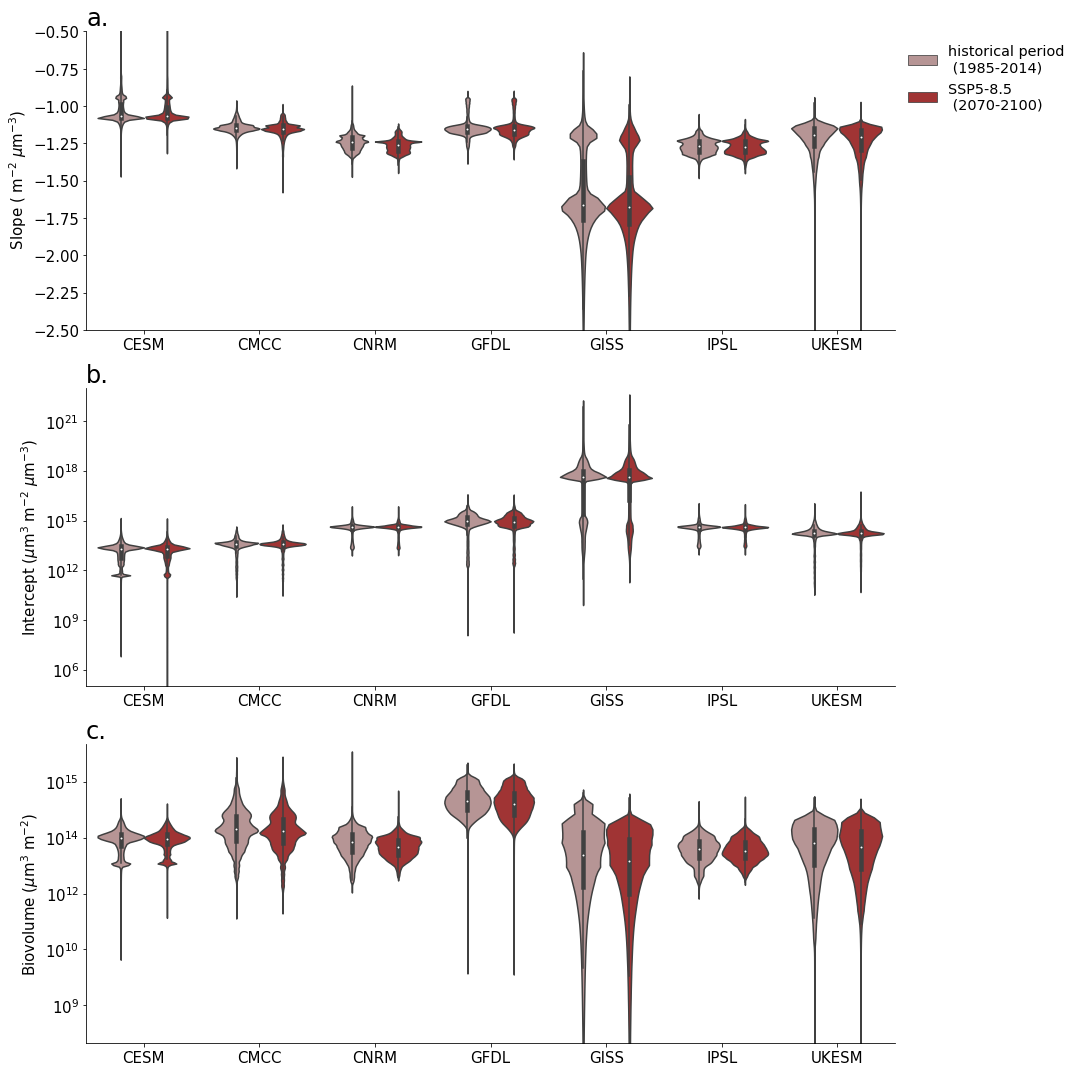

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
letters = ['a.','b.','c.']
ind=0
variables = ['slope', 'intercept', 'total_biovolume']
for r, var in enumerate(variables):
    ind +=1
    axs[r].set_title(letters[ind-1], loc='left', fontsize=24)
    if var == 'slope':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments, fill=False, showfliers = False,density_norm="count", data=df_NBSS) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylim([-2.5, -0.5])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        L = axs[r].legend(title='', fontsize = 'x-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        L.get_texts()[0].set_text('historical period \n (1985-2014)')
        L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
        #L.get_texts()[2].set_text('observations \n (PSSdb)')

    elif var == 'intercept':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False, showfliers = False,   density_norm="count",data=df_NBSS, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        axs[r].set_ylim([5, 23])
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
        
    elif var == 'total_biovolume':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False, showfliers = False,  density_norm="count",data=df_NBSS, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 15)
        axs[r].set_ylim([8, 16])
        #axs[r].set_yscale('log')
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_model_avg_biovolume.pdf', dpi=300)

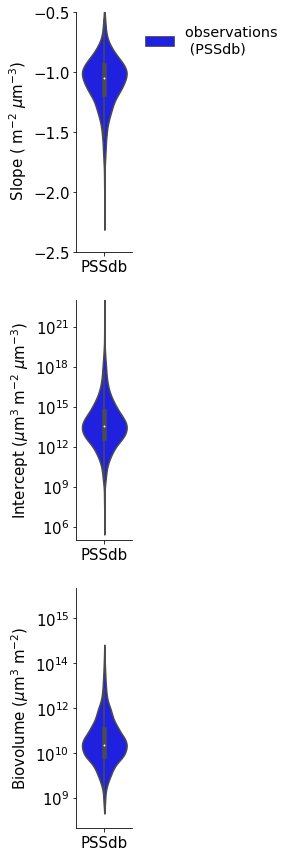

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(1,15))
letters = ['a.','b.','c.']
ind=0
variables = ['slope', 'intercept', 'total_biovolume']
for r, var in enumerate(variables):
    if var == 'slope':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments, fill=False, showfliers = False, density_norm="count", data=df_pssdb) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylim([-2.5, -0.5])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        L = axs[r].legend(title='', fontsize = 'x-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        #L.get_texts()[0].set_text('historical period \n (1985-2014)')
        #L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
        L.get_texts()[0].set_text('observations \n (PSSdb)')

    elif var == 'intercept':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False, showfliers = False,  density_norm="count",data=df_pssdb, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        axs[r].set_ylim([5, 23])
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
        
    elif var == 'total_biovolume':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False,showfliers = False,  density_norm="count",data=df_pssdb, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 15)
        axs[r].set_ylim([8, 16])
        #axs[r].set_yscale('log')
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_model_avg_biovolume_PSSdb.pdf', dpi=300)

In [38]:
df_pssdb

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-0.711575,10.534620,10.674206,0.947649,obs,HCSS,PSSdb
1,-1.013523,13.588307,11.927995,0.966109,obs,HCSS,PSSdb
2,-0.727859,11.050427,12.533836,0.865061,obs,HCSS,PSSdb
3,-0.829441,12.244878,11.940906,0.983299,obs,HCSS,PSSdb
4,-0.684871,10.891841,12.003429,0.950746,obs,HCSS,PSSdb
...,...,...,...,...,...,...,...
1212,-0.581804,9.593633,9.768737,0.903101,obs,HCSS,PSSdb
1213,-1.014763,13.386958,12.117291,0.943349,obs,HCSS,PSSdb
1214,-0.643737,7.889982,11.290374,0.979019,obs,HCSS,PSSdb
1215,-0.728118,11.329221,11.602857,0.945405,obs,HCSS,PSSdb


In [39]:
model_list = model_list + ['PSSdb', 'GISS']
model_list

['CESM', 'CMCC', 'CNRM', 'GFDL', 'GISS', 'IPSL', 'UKESM', 'PSSdb', 'GISS']

In [40]:
for r, var in enumerate(variables):
    print(r)

0
1
2


In [41]:
df_NBSS.source.unique()

array(['CESM', 'CMCC', 'CNRM', 'GFDL', 'GISS', 'IPSL', 'UKESM'],
      dtype=object)

In [42]:
model

NameError: name 'model' is not defined

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(30,10))
variables = ['slope', 'intercept']
for c, m in enumerate(model_list):
    #print(r)
    for r, var in enumerate(variables):
        #print(c)
        ax_n = axs[r,c]
        if m == 'PSSdb':
            sns.boxplot(ax = ax_n, x="biome", y=var, color='g', order =['LC', 'HCSS', 'HCPS'],  showfliers = False, data=df_NBSS[df_NBSS['source']== m])#.set(title= (name + ' for model ' + m + ' by biome'))
        else:
            sns.boxplot(ax = ax_n, x="biome", y=var, hue="experiment",order =['LC', 'HCSS', 'HCPS'], showfliers = False, data=df_NBSS[df_NBSS['source']== m])#.set(title= (name + ' for model ' + m + ' by biome'))
            if r >0 or c >0:
                ax_n.get_legend().remove()
        ax_n.tick_params(axis='both', which='major', labelsize=15)
        if r == 0:
            ax_n.set_title(m, fontsize=20)
        else:
            ax_n.set_title('')
        if var == 'slope':
            ax_n.set_ylim([-1.9, -0.4])

            if m =='GISS':
                ax_n.set_ylim([-4, -0.5])

        elif var == 'intercept':  
            ax_n.set_ylim([7, 22])
            
            if m =='GISS':
                ax_n.set_ylim([13,40])


        if var == 'slope':
            ax_n.set_ylabel(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 17)
        else:
            ax_n.set_ylabel(r'$log_{10}$(Intercept ($\mu$m$^{-3}$ m$^{-2}$ $\mu$m$^{-3}$))', fontsize = 17)
        
        ax_n.set_xlabel('')
        #ax_n.set_xticklabels('biomes', fontsize=15)
        #ax_n.set_yticklabels(var, fontsize=15)

        
            
plt.tight_layout()
plt.savefig('fig_biomes_biovol_avg.pdf', dpi=300)

In [ ]:
            if m =='UKESM':
                ax_n.set_ylim([-1.91, -1.5])
            if m =='CNRM':
                ax_n.set_ylim([-1.6, -1.4])
            if m =='IPSL':
                ax_n.set_ylim([-1.6, -1.4])
            if m =='CMCC':
                ax_n.set_ylim([-1.6, -1.4])  
            if m =='CESM':
                ax_n.set_ylim([-1.20, -0.9])
            if m =='GFDL':
                ax_n.set_ylim([-1.65, -1.5])
                
                if m =='CESM':
                ax_n.set_ylim([14.5,18])
            if m =='CMCC':
                ax_n.set_ylim([16.5,19])
            if m =='CNRM':
                ax_n.set_ylim([17.25,18.25]) 
            if m =='GFDL':
                ax_n.set_ylim([17,21.5])
                            if m =='IPSL':
                ax_n.set_ylim([16.5,18.5])
            if m =='UKESM':
                ax_n.set_ylim([18.5,21])

## climatology

In [45]:
#import data and create dictionary
# create a dictionary with the datasets
clim_list = glob('/work/m1c/CMIP6_biome_PSS_data/*climatology*.nc')
model_list_clim = ['CMCC', 'CNRM', 'IPSL', 'CESM', 'GISS', 'COBALT']
ds_dict_clim = {}
for m in model_list_clim:
    model_path = [x for x in clim_list if m in x]
    ds_dict_clim[m]= xr.open_mfdataset(model_path[0])

IndexError: list index out of range

In [4]:
df_PSSdb = pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/PSSdb_data_full.csv', sep= ',')
df_pssdb.head()

,lat,lon,biomes,month,betas,intercept,R2,season,experiment,source,select
0,80.5,69.5,HCSS,8.0,-0.71190,5.5480,0.94710,Summer,obs,PSSdb,80.5_69.5
1,79.5,60.5,HCSS,8.0,-1.01355,8.5735,0.96645,Summer,obs,PSSdb,79.5_60.5
2,79.5,66.5,HCSS,7.0,-0.72810,5.7520,0.86600,Summer,obs,PSSdb,79.5_66.5
3,79.5,69.5,HCSS,8.0,-0.82930,6.9430,0.98490,Summer,obs,PSSdb,79.5_69.5
4,79.5,71.5,HCSS,7.0,-0.68480,5.7125,0.95245,Summer,obs,PSSdb,79.5_71.5


In [ ]:
ds_dict_clim['CMCC']

TypeError: unsupported operand type(s) for +: 'int' and 'list'

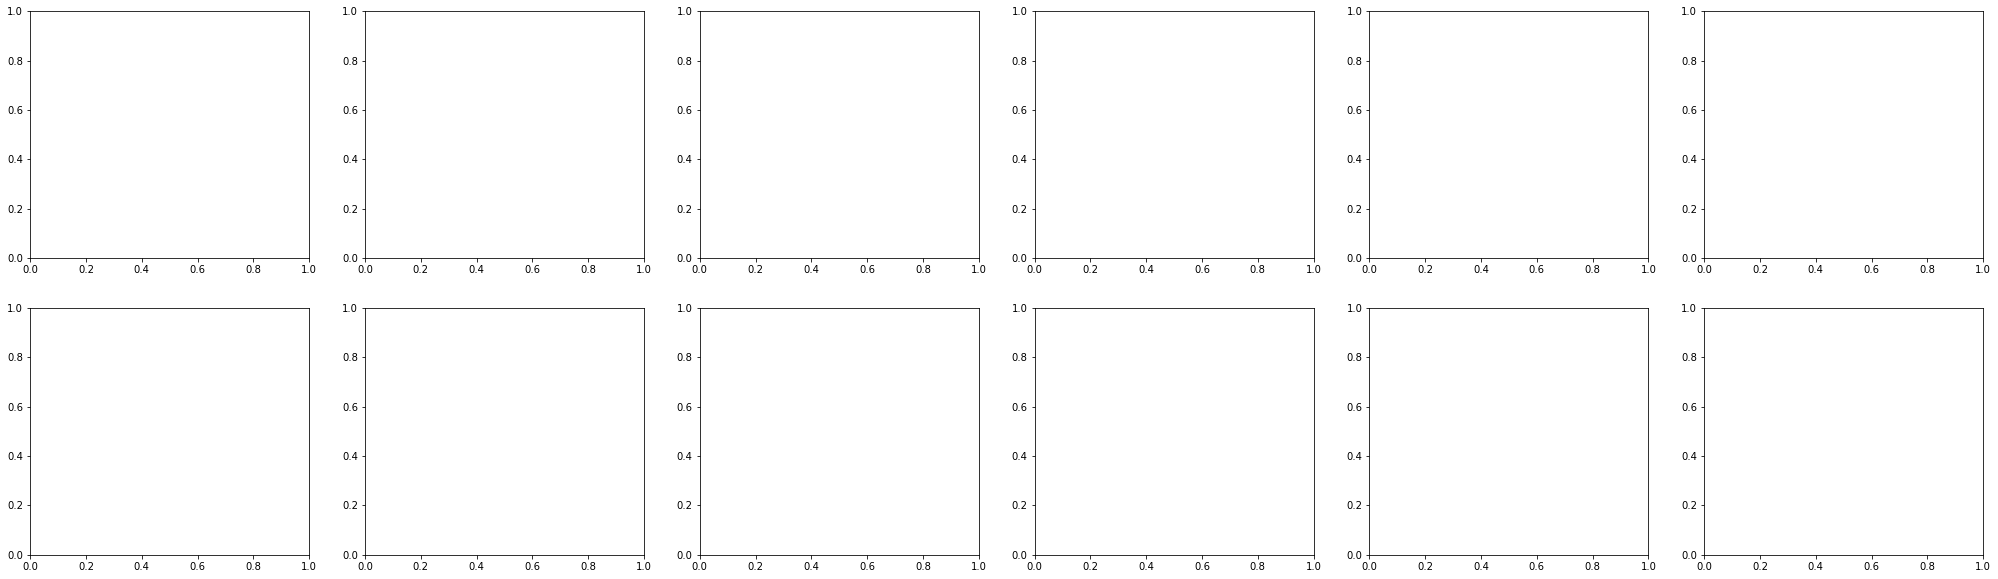

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(35,10))
for c, m in enumerate(model_list_clim):
    ds = ds_dict_clim[m]
    for r, v in enumerate(['betas', 'intercept']):
     
        LC_clim_b_ssp5 = ds['LC_ssp5_' + v].values
        HCPS_clim_b_ssp5 = ds['HCPS_ssp5_' + v].values
        HCSS_clim_b_ssp5 = ds['HCSS_ssp5_' + v].values
        
        LC_clim_b_hist = ds['LC_hist_' + v].values
        HCPS_clim_b_hist = ds['HCPS_hist_' + v].values
        HCSS_clim_b_hist = ds['HCSS_hist_' + v].values
        ax_n = axs[r,c]

        sns.lineplot(ax= ax_n, data=[LC_clim_b_hist, HCPS_clim_b_hist, HCSS_clim_b_hist, LC_clim_b_ssp5, HCPS_clim_b_ssp5, HCSS_clim_b_ssp5],
                 palette=["indigo", "darkmagenta", "orchid", "indigo", "darkmagenta", "orchid"],
                 dashes=[[6, 0], [6, 0], [6, 0],[4, 4],[4, 4],[4, 4] ])
        ax_n.tick_params(axis='both', which='major', labelsize=15)
        if r == 0:
            ax_n.set_title(m, fontsize=20)
        else:
            ax_n.set_title('')
        if v == 'betas':
            ax_n.set_ylabel(r' Slope ( m$^{-2}$ g C$^{-1}$)', fontsize = 17)
        elif v == 'intercept':
            ax_n.set_ylabel(r'Intercept ( g C m$^{-2}$ g C$^{-1}$)', fontsize = 17)
        ax_n.set_xlabel(r'Month', fontsize = 17)
        ax_n.legend(labels=['LC', 'HCPS','HCSS'])
        if r >0 or c >0:
            ax_n.get_legend().remove()
        
    
    
plt.tight_layout()
plt.savefig('fig_biomes_clim.pdf', dpi=300)

In [17]:

for c, m in enumerate(model_list_clim):
    ds = ds_dict_clim[m]
    for r, v in enumerate(['betas', 'intercept']):
     
        df_plot = ds['LC_ssp5_' + v].to_dataframe()
        print(df_plot)

        
    
    
#plt.tight_layout()
#plt.savefig('fig_biomes_clim.pdf', dpi=300)

       LC_ssp5_betas
month               
1          -1.327739
2          -1.332290
3          -1.337514
4          -1.334462
5          -1.331027
6          -1.335809
7          -1.329063
8          -1.325465
9          -1.322924
10         -1.320188
11         -1.320615
12         -1.323852
       LC_ssp5_intercept
month                   
1               1.640778
2               1.623036
3               1.654620
4               1.781975
5               1.892209
6               1.954998
7               1.965063
8               1.919753
9               1.902787
10              1.864952
11              1.782954
12              1.698140
       LC_ssp5_betas
month               
1          -1.289195
2          -1.293515
3          -1.298757
4          -1.306327
5          -1.316645
6          -1.319209
7          -1.311834
8          -1.307133
9          -1.299431
10         -1.292118
11         -1.288095
12         -1.287402
       LC_ssp5_intercept
month                   
1           